In [2]:
# 2 cluster case
import scipy
from itertools import permutations
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from scipy.spatial import voronoi_plot_2d
import matplotlib.pyplot as plt
from clustering_algorithms.kmeans import k_means_clustering
from clustering_algorithms.plot_against import plot_against
from feature_importance_development.feautre_importance_partitioning_higher_dimensions import feature_importance_weight_by_volume
from feature_importance_development.feature_importance_partitioning import plot_importance_profiles
from datasets.generate_synthetic_data import generate_feature_separated_data

In [3]:
def make_clusters(no_clusters_per_feature, cluster_size, return_means=False):
    no_features = len(no_clusters_per_feature)
    output = np.zeros((np.prod(no_clusters_per_feature)*cluster_size, no_features))
    # generate real features
    feature_centres = []
    for cluster_in_feature in no_clusters_per_feature:
        feature_centres.append([np.mean([i/cluster_in_feature, (i+1)/cluster_in_feature]) for i in range(cluster_in_feature)])
    means = []
    for x_vals in feature_centres:
        if len(means) == 0:
            for x in x_vals:
                means.append([x])
        else:
            cur_len = len(means)
            means = means * len(x_vals)
            for index, x in enumerate(x_vals):
                for i in range(cur_len * index, cur_len * index + cur_len):
                    means[i] = means[i] + [x]

    std_1 = [1/(10  * no_cluster) for no_cluster in no_clusters_per_feature]

    samples_1 = None
    for index, mean in enumerate(means):
        # generate samples
        cluster = np.random.normal(mean, std_1, size=[cluster_size, no_features])
        if samples_1 is None:
            samples_1 = cluster
        else:
            samples_1 = np.vstack((samples_1, cluster))


    if return_means:
        return samples_1, np.array(means)
    return samples_1


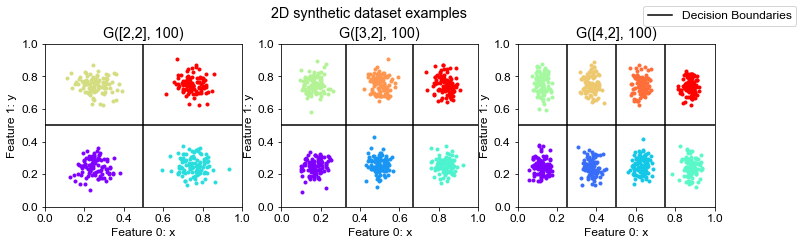

In [29]:
fig, ax = plt.subplots(1,3 ,figsize=(12,3))
data = make_clusters([2,2], 100)
from matplotlib import cm
colors = iter(cm.rainbow(np.linspace(0, 1, 4)))
for i in range(4):
    col =next(colors)
    ax[0].plot(data[i*100: (i+1)*100][:,0], data[i*100: (i+1)*100][:,1], '.', color=col)
data = make_clusters([3,2], 100)
colors = iter(cm.rainbow(np.linspace(0, 1, 6)))

for i in range(6):
    col = next(colors)
    
    ax[1].plot(data[i*100: (i+1)*100][:,0], data[i*100: (i+1)*100][:,1], '.', color=col)


for i in range(3):
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,1)
ax[0].plot([.5,.5],[-.1,1.1], '-k', label="Decision Boundaries")
ax[1].plot([-.1,1.1], [.5,.5], '-k')
ax[2].plot([.5,.5],[-.1,1.1], '-k')
ax[2].plot([.25,.25],[-.1,1.1], '-k')
ax[2].plot([.75,.75],[-.1,1.1], '-k')
ax[1].plot([.33,.33],[-.1,1.1], '-k')
ax[1].plot([.667,.667],[-.1,1.1], '-k')






ax[0].plot([-.1,1.1], [.5,.5], '-k')
ax[2].plot([-.1,1.1], [.5,.5], '-k')

data = make_clusters([4,2], 100)
colors = iter(cm.rainbow(np.linspace(0, 1, 8)))

for i in range(8):
    col = next(colors)
    ax[2].plot(data[i*100: (i+1)*100][:,0], data[i*100: (i+1)*100][:,1], '.', color=col)


for i in range(3):
    ax[i].set_xlabel("Feature 0: x")
    ax[i].set_ylabel("Feature 1: y")
ax[0].set_title("G([2,2], 100)")
ax[1].set_title("G([3,2], 100)")
ax[2].set_title("G([4,2], 100)")
fig.suptitle("2D synthetic dataset examples", y=1.05)
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 12
fig.legend()
fig.savefig("grid_examples.png", dpi=100, bbox_inches='tight')

In [672]:
    MSE, clusters, centroids, initial_centroids, importance_profiles = k_means_clustering(data=data, no_dim=no_dim, feature_importance=True, no_centroids=no_centroids, centroids=inital_means)





Iteration: 0
Iteration: 1
